In [7]:
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action='ignore', category=UserWarning) 

### Models

In [8]:
models ='/home/ronaldo/github/smart-cities-pollution/models/models.p'

updated_models = pickle.load(open(models, "rb"))

param_norm ='/home/ronaldo/github/smart-cities-pollution/models/data.p'

norm = pickle.load(open(param_norm, "rb"))

### Data

In [9]:
# columns
col=['avg_congested_prop', 'max_length', 'avg_speed', 'min_median_level',
       'bool_highway', 'bool_ramps', 'count_highway', 'count_streets',
       'count_primary', 'count_secondary', 'count_primary_street',
       'count_primary_ramps']


# X for all stations
df_X=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Waze Data/X_stations.csv')
h3=df_X['h3id']
df_X=df_X[col]

# y for Lima
y_lima=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Lima/lima2019.csv')
# y for Quito
y_quito=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Quito/quito2019.csv')
# y for Xalapa
y_xalapa=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Xalapa/xalapa2019.csv')
# y for Montevideu
y_montevideo=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Montevideo/montevideo2019.csv')
# y for Sao Paulo
y_sp=pd.read_csv('/home/ronaldo/github/smart-cities-pollution/data/Sao Paulo/saopaulo2019.csv')




### Normalization

In [10]:
# Data used in original normalization
dfTemp = pd.DataFrame(columns=col)
dfTemp.loc[0] = norm[1][1]['model_data']['scaler-data_min_']
dfTemp.loc[1] =norm[1][1]['model_data']['scaler-data_max_']

# Create MaxMin scaler
scaler = MinMaxScaler()
scaler.fit(dfTemp)
x_scaled = scaler.transform(df_X)
df_X = pd.DataFrame(x_scaled)
df_X.columns=col
df_X['h3id']=h3

In [116]:


concentration_labels = {
    'BC': r'$\mu$g m$^{-3}$',
    'NO': r'ppb',
    'NO2': r'ppb'
}

pollutant = {'BC': 'BC', 'NO': 'NO', 'NO2': r'NO$_2$'}


# predictions
y_pred_NO2=updated_models['NO2'].predict(df_X[col])
y_pred_NO=updated_models['NO'].predict(df_X[col])

df_ypred=pd.DataFrame({'h3id':df_X['h3id'],'NO2':y_pred_NO2,'NO':y_pred_NO})

Text(0.5, 0.98, 'Sao Paulo')

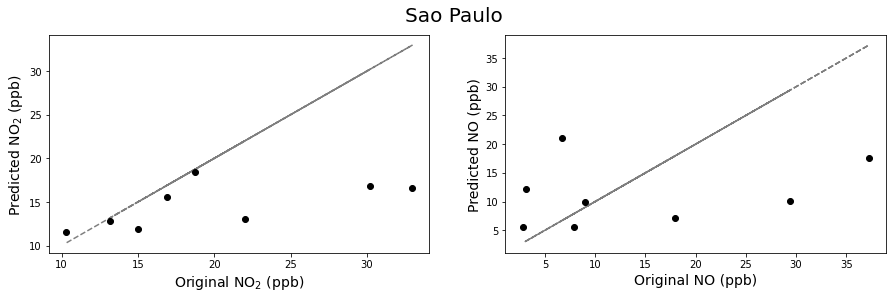

In [117]:
## Sao Paulo

# Select values
df_ypredSP=df_ypred.loc[df_ypred['h3id'].isin(y_sp['h3id'])]

# # sort
df_ypredSP=df_ypredSP.sort_values(by='h3id')
y_sp=y_sp.sort_values(by='h3id')

# # It is missing X data for Pico do Jaragua 

plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
plt.plot(y_sp['NO2'].drop(index=7),y_sp['NO2'].drop(index=7),'--', c='black', alpha=0.5)
plt.plot(y_sp['NO2'].drop(index=7),df_ypredSP['NO2'],'ko')
plt.xlabel('Original {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)
plt.ylabel('Predicted {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)

plt.subplot(1,2,2)
plt.plot(y_sp['NO'].drop(index=7),y_sp['NO'].drop(index=7),'--', c='black', alpha=0.5)
plt.plot(y_sp['NO'].drop(index=7),df_ypredSP['NO'],'ko')
plt.xlabel('Original {} ({})'.format(pollutant['NO'],concentration_labels['NO']),fontsize=14)
plt.ylabel('Predicted {} ({})'.format(pollutant['NO'],concentration_labels['NO']),fontsize=14)

plt.suptitle('Sao Paulo',fontsize=20)

Text(0.5, 1.0, 'Quito')

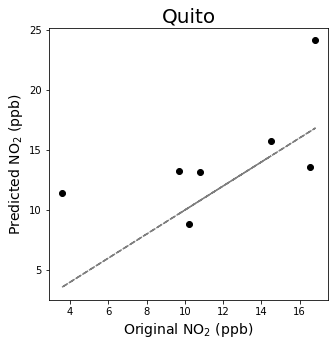

In [118]:
## Quito

# Select values
df_ypredQuito=df_ypred.loc[df_ypred['h3id'].isin(y_quito['h3id'])]

# sort
df_ypredQuito=df_ypredQuito.sort_values(by='h3id')
y_quito=y_quito.sort_values(by='h3id')

# It is missing X data for Pico do Jaragua 

plt.figure(figsize=(5, 5))

plt.plot(y_quito['NO2'],y_quito['NO2'],'--', c='black', alpha=0.5)
plt.plot(y_quito['NO2'],df_ypredQuito['NO2'],'ko')
plt.xlabel('Original {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)
plt.ylabel('Predicted {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)


plt.title('Quito',fontsize=20)

Text(0.5, 1.0, 'Montevideo')

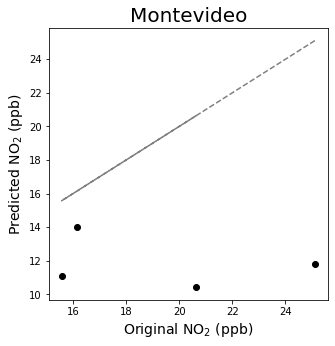

In [119]:
## Montevideo

# Select values
df_ypredMontevideo=df_ypred.loc[df_ypred['h3id'].isin(y_montevideo['h3id'])]

# sort
df_ypredMontevideo=df_ypredMontevideo.sort_values(by='h3id')
y_montevideo=y_montevideo.sort_values(by='h3id')

# It is missing X data for Pico do Jaragua 

plt.figure(figsize=(5, 5))

plt.plot(y_montevideo['NO2'],y_montevideo['NO2'],'--', c='black', alpha=0.5)
plt.plot(y_montevideo['NO2'],df_ypredMontevideo['NO2'],'ko')
plt.xlabel('Original {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)
plt.ylabel('Predicted {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)


plt.title('Montevideo',fontsize=20)

Text(0.5, 1.0, 'Lima')

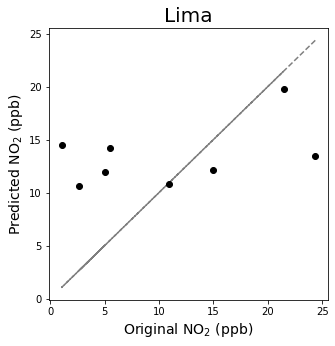

In [120]:
## Lima

# Select values
df_ypredLima=df_ypred.loc[df_ypred['h3id'].isin(y_lima['h3id'])]

# sort
df_ypredLima=df_ypredLima.sort_values(by='h3id')
y_lima=y_lima.sort_values(by='h3id')

# It is missing X data for Pico do Jaragua 

plt.figure(figsize=(5, 5))

plt.plot(y_lima['NO2'],y_lima['NO2'],'--', c='black', alpha=0.5)
plt.plot(y_lima['NO2'],df_ypredLima['NO2'],'ko')
plt.xlabel('Original {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)
plt.ylabel('Predicted {} ({})'.format(pollutant['NO2'],concentration_labels['NO2']),fontsize=14)


plt.title('Lima',fontsize=20)